In [4]:
import random
import numpy as np

In [95]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    def backprop(self, x, y):
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

def cost_derivative(output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [203]:
net = Network([3, 4, 1])

In [204]:
net.sizes

[3, 4, 1]

In [205]:
net.num_layers

3

In [206]:
net.biases

[array([[ 0.16206226],
        [-0.70030588],
        [-0.62239334],
        [ 1.66877834]]), array([[ 0.32870336]])]

In [207]:
net.weights

[array([[-1.30313304, -0.51086022,  0.73072451],
        [-0.60354507,  0.19370659,  1.06688532],
        [ 2.19522426,  0.38280142,  1.113829  ],
        [ 2.21620655, -0.11110447,  0.88707761]]),
 array([[ 0.34983661,  0.42500422, -1.67303179, -0.18466192]])]

In [208]:
b = zip(net.biases, net.weights)

In [209]:
x = np.array([np.random.randn(3)]).reshape((3, 1))# for i in np.arange(10)])#.reshape((3, 10))
y = np.random.randn(1)

In [210]:
nabla_b = [np.zeros(b.shape) for b in net.biases]
nabla_w = [np.zeros(w.shape) for w in net.weights]

activation = x
activations = [x]

In [211]:
b = net.biases[0]
w = net.weights[0]

z = np.dot(w, activation) + b

In [212]:
zs = [] # list to store all the z vectors, layer by layer
for b, w in zip(net.biases, net.weights):
    z = np.dot(w, activation)+b
    zs.append(z)
    activation = sigmoid(z)
    activations.append(activation)

In [213]:
delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
nabla_b[-1] = delta
nabla_w[-1] = np.dot(delta, activations[-2].transpose())

In [214]:
delta

array([[ 0.01646985]])

In [215]:
nabla_b

[array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]), array([[ 0.01646985]])]

In [216]:
nabla_w

[array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]),
 array([[ 0.00397544,  0.00346666,  0.00889029,  0.01482857]])]

In [217]:
l = 2
z = zs[-l]
z

array([[-1.14514487],
       [-1.32200454],
       [ 0.15950602],
       [ 2.20108425]])

In [218]:
sp = sigmoid_prime(z)
delta = np.dot(net.weights[-l+1].transpose(), delta) * sp
delta

array([[ 0.00105506],
       [ 0.00116323],
       [-0.00684501],
       [-0.00027288]])

In [219]:
nabla_b[-l] = delta
nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())

In [220]:
nabla_b

[array([[ 0.00105506],
        [ 0.00116323],
        [-0.00684501],
        [-0.00027288]]), array([[ 0.01646985]])]

In [221]:
nabla_w

[array([[ 0.00048485,  0.00077467, -0.00048118],
        [ 0.00053456,  0.0008541 , -0.00053051],
        [-0.0031456 , -0.00502594,  0.00312178],
        [-0.0001254 , -0.00020036,  0.00012445]]),
 array([[ 0.00397544,  0.00346666,  0.00889029,  0.01482857]])]

In [222]:
activations[-l-1].transpose()

array([[ 0.4595466 ,  0.73424797, -0.45606611]])

In [223]:
np.dot(delta, activations[-l-1].transpose())

array([[ 0.00048485,  0.00077467, -0.00048118],
       [ 0.00053456,  0.0008541 , -0.00053051],
       [-0.0031456 , -0.00502594,  0.00312178],
       [-0.0001254 , -0.00020036,  0.00012445]])

In [224]:
nabla_b

[array([[ 0.00105506],
        [ 0.00116323],
        [-0.00684501],
        [-0.00027288]]), array([[ 0.01646985]])]

In [225]:
nabla_w

[array([[ 0.00048485,  0.00077467, -0.00048118],
        [ 0.00053456,  0.0008541 , -0.00053051],
        [-0.0031456 , -0.00502594,  0.00312178],
        [-0.0001254 , -0.00020036,  0.00012445]]),
 array([[ 0.00397544,  0.00346666,  0.00889029,  0.01482857]])]

In [226]:
for l in np.arange(2, net.num_layers):
    z = zs[-l]
    sp = sigmoid_prime(z)
    delta = np.dot(net.weights[-l+1].transpose(), delta) * sp
    nabla_b[-l] = delta
    nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())

ValueError: shapes (4,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)

In [139]:
np.arange(2, net.num_layers)

array([2])

In [137]:
(nabla_b, nabla_w)

([array([[ 0.],
         [ 0.],
         [ 0.],
         [ 0.]]), array([[-0.07345446]])], [array([[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]),
  array([[-0.03003113, -0.02762548, -0.02711768, -0.07210495]])])

In [136]:
len(activations)

3

In [124]:
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

NameError: name 'self' is not defined

In [94]:
a = [1, 2, 3]

In [27]:
a

[1, 2, 3]

In [28]:
a[-1]

3

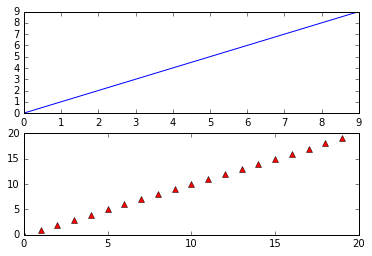

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Make an example plot with two subplots...
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(range(10), 'b-')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(range(20), 'r^')


In [4]:
%matplotlib inline 